In [2]:
import os
os.chdir('/content/drive/My Drive/Deep Learning/Phân loại văn bản')

In [3]:
import pickle

X_data = pickle.load(open('data/X_data.pkl', 'rb'))
y_data = pickle.load(open('data/y_data.pkl', 'rb'))

X_test = pickle.load(open('data/X_test.pkl', 'rb'))
y_test = pickle.load(open('data/y_test.pkl', 'rb'))

In [4]:
X_data[100]

'việc xây_dựng đại_học hàng_đầu là khẩp cấp giáo_dục đại_học nước ta có số_lượng sinh_viên khá đông_đảo nhưng chất_lượng cần phải nâng lên nhiều mới đạt yêu_cầu hiện_nay việt nam không có một đh nào có_thể xếp_hạng trong khu_vực asean không có một đh nào ngay cả các đại_học quốc_gia tại hà_nội và tphcm có_thể xem là nổi_trội hơn hẳn các đh khác trong vài năm trở_lại đây cải_tổ giáo_dục tại việt nam là một đề_tài thảo_luận rất sôi_động trên các diễn_đàn công cũng như tư sau chuyến viếng_thăm đại_học harvard của thủ_tướng tháng sáu vừa_qua các thảo_luận có xu_hướng tập_trung vào đại_học đẳng_cấp quốc_tế đại_học chất_lượng cao đhclc và đại_học hàng_đầu đhhđ gần đây nhất gs thomas vallely giám_đốc chuơng trình việt_nam tại đại_học harvard đã gửi đến chính_phủ việt nam một đề_cương về xây_dựng đhhđ tại việt nam nội_dung của đề_cương này cũng tương_tự như các đề_xuất đề_án trong xêmina cải_cách giáo_dục do giáo_sư hoàng_tụy chủ xướng hay hội_thảo hè đà_nẵng do một nhóm việt kiều trí_thức tổ_

In [5]:
from keras.layers import *
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.optimizers import Adam
from sklearn import metrics
from sklearn.metrics import classification_report

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_data_n = encoder.fit_transform(y_data)
y_test_n = encoder.fit_transform(y_test)

encoder.classes_ # kết quả: array(['Chinh tri Xa hoi', 'Doi song', 'Khoa hoc', 'Kinh doanh',
                 #                 'Phap luat', 'Suc khoe', 'The gioi', 'The thao', 'Van hoa',
                 #                 'Vi tinh'], dtype='<U16')

array(['Chinh tri Xa hoi', 'Doi song', 'Khoa hoc', 'Kinh doanh',
       'Phap luat', 'Suc khoe', 'The gioi', 'The thao', 'Van hoa',
       'Vi tinh'], dtype='<U16')

In [23]:
import matplotlib.pyplot as plt
import numpy as np


In [27]:
def train_model(classifier, X_data, y_data, X_test, y_test, numOfEpoch):       
    X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.1, random_state=42)
  
    H=classifier.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=numOfEpoch, batch_size=512)
    
    val_predictions = classifier.predict(X_val)
    test_predictions = classifier.predict(X_test)
    val_predictions = val_predictions.argmax(axis=-1)
    test_predictions = test_predictions.argmax(axis=-1)
    
    plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
    plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
    plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
    plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
    plt.title('Accuracy and Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss|Accuracy')
    plt.legend()

    print("Validation accuracy: ", metrics.accuracy_score(val_predictions, y_val))
    print("Test accuracy: ", metrics.accuracy_score(test_predictions, y_test))
    print("================Đánh giá model===============")
    print(classification_report(y_test, test_predictions, target_names=list(encoder.classes_)))

In [8]:
def create_brnn_model():
    input_layer = Input(shape=(300,))
    
    layer = Reshape((10, 30))(input_layer)
    layer = Bidirectional(LSTM(128, activation='relu'))(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(512, activation='relu')(layer)
    layer = Dense(128, activation='relu')(layer)
    
    output_layer = Dense(10, activation='softmax')(layer)
    
    classifier = models.Model(input_layer, output_layer)
    classifier.summary()
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return classifier

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from keras import layers, models, optimizers

In [11]:
# Tf-Idf Vectors as Features
# TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
# IDF(t) = log_e(Total number of documents / Number of documents with term t in it)

# ngram level - we choose max number of words equal to 30000 except all words (100k+ words)
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', max_features=30000, ngram_range=(2, 3))
tfidf_vect_ngram.fit(X_data)
X_data_tfidf_ngram =  tfidf_vect_ngram.transform(X_data)
X_test_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)

In [12]:
from sklearn.decomposition import TruncatedSVD

svd_ngram = TruncatedSVD(n_components=300, random_state=42)
svd_ngram.fit(X_data_tfidf_ngram)

X_data_tfidf_ngram_svd = svd_ngram.transform(X_data_tfidf_ngram)
X_test_tfidf_ngram_svd = svd_ngram.transform(X_test_tfidf_ngram)

In [28]:
classifier = create_brnn_model()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 300)]             0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 10, 30)            0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 256)               162816    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

Epoch 1/35
60/60 [==============================] - 2s 38ms/step - loss: 2.0599 - accuracy: 0.2639 - val_loss: 1.5024 - val_accuracy: 0.4825
Epoch 2/35
60/60 [==============================] - 2s 34ms/step - loss: 1.1579 - accuracy: 0.6088 - val_loss: 0.9639 - val_accuracy: 0.6866
Epoch 3/35
60/60 [==============================] - 2s 34ms/step - loss: 0.7859 - accuracy: 0.7544 - val_loss: 0.7398 - val_accuracy: 0.7657
Epoch 4/35
60/60 [==============================] - 2s 34ms/step - loss: 0.6760 - accuracy: 0.7870 - val_loss: 0.6429 - val_accuracy: 0.8024
Epoch 5/35
60/60 [==============================] - 2s 39ms/step - loss: 0.6100 - accuracy: 0.8094 - val_loss: 0.6584 - val_accuracy: 0.7956
Epoch 6/35
60/60 [==============================] - 2s 34ms/step - loss: 0.5845 - accuracy: 0.8145 - val_loss: 0.5853 - val_accuracy: 0.8131
Epoch 7/35
60/60 [==============================] - 2s 33ms/step - loss: 0.5379 - accuracy: 0.8288 - val_loss: 0.5750 - val_accuracy: 0.8184
Epoch 8/35
60

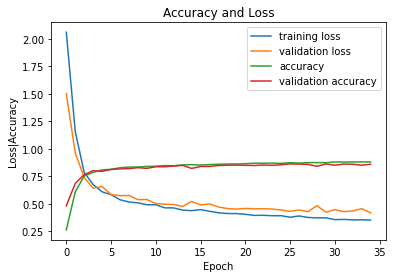

In [29]:
train_model(classifier=classifier, X_data=X_data_tfidf_ngram_svd, y_data=y_data_n, X_test=X_test_tfidf_ngram_svd, y_test=y_test_n, numOfEpoch=35)